Outline (to be removed)
* Basic visualization (show all 3 visualizations)
* Advanced Visualization (size, color, text encodings, etc.); demonstrate shared kwargs work the same across all 3 visualizations; demonstrate different ways of encoding (array, dictionary, function)
* Advanced Visualization for Euler
* Advanced Visualization for UpSet
* Advance Visualization TwoColumn Bipartite

In [1]:
# !pip install hypernetx ## uncomment this to use Colab

In [4]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter('ignore')

from collections import defaultdict
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence); reload(draw_bipartite)


### GraphViz is arguably the best graph drawing tool, but it is old and tricky to install.
### Uncommenting the line below will get you slightly better layouts, if you can get it working...

# from networkx.drawing.nx_agraph import graphviz_layout as layout

<module 'hypernetx.drawing.draw_bipartite' from '/Users/yunj738/projects/hypernetx/hypernetx/drawing/draw_bipartite.py'>

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [6]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

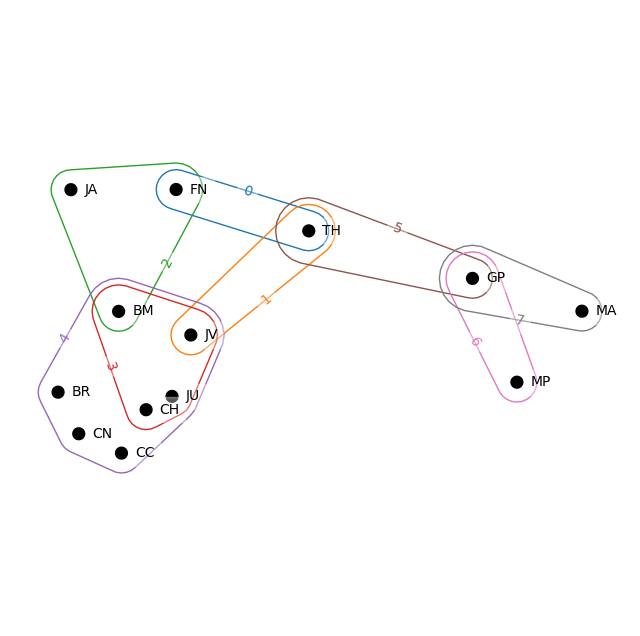

In [7]:
hnx.drawing.draw(H)

We can also view the dual of this graph easily, using the `H.dual()` command.

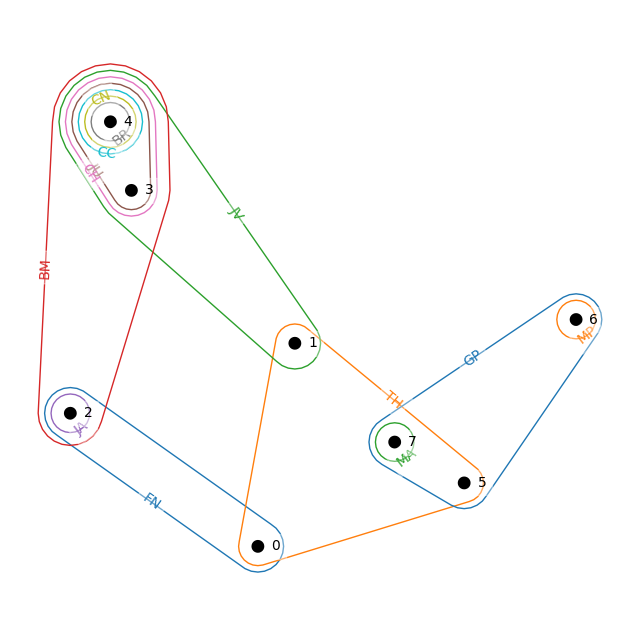

In [8]:
hnx.drawing.draw(H.dual())

['CN', 'CC', 'BR', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MA', 'MP'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(7), np.int64(6)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(7): (0, 10), np.int64(6): (0, 11), 'CN': (6.5, 0), 'CC': (6.5, 1), 'BR': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MA': (6.5, 11), 'MP': (6.5, 12)}


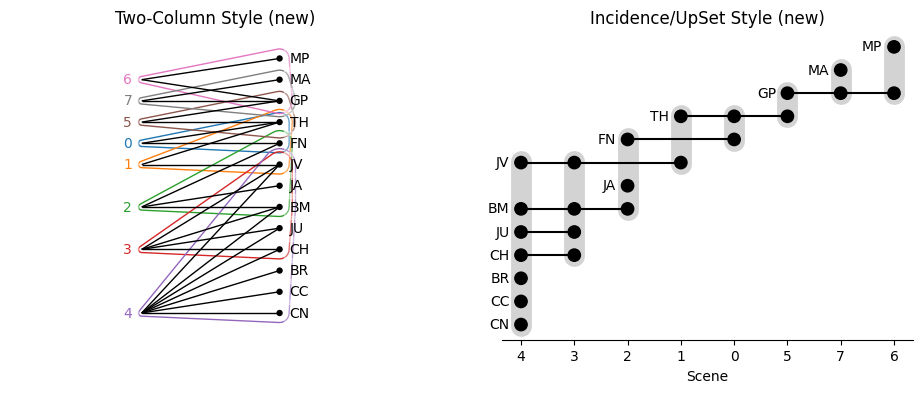

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

plt.subplot(132)
plt.title('Two-Column Style (new)')
draw_bipartite.draw_bipartite_using_euler(H)

plt.subplot(133)
plt.title('Incidence/UpSet Style (new)')
draw_incidence.draw_incidence_upset(
    H,
)
plt.xlabel('Scene');